Loading required package: ggplot2



,pain_score,condition,person
,<int>,<fct>,<fct>
1,4,condition_1,1
2,5,condition_1,2
3,4,condition_1,3
4,3,condition_1,4
5,4,condition_1,5
6,3,condition_1,6
7,2,condition_1,7
8,4,condition_1,8
9,4,condition_1,9



	Friedman rank sum test

data:  pain_score and condition and person
Friedman chi-squared = 18.896, df = 2, p-value = 7.887e-05

[1] "There is a significant difference in the mean ranks of the different conditions."

	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  df$pain_score and df$condition 

            condition_1 condition_2
condition_2 0.011       -          
condition_3 5.3e-05     0.065      

P value adjustment method: BH 
[1] "There was a significant difference between the mean ranks of the pain scores of of condition 1 & condition 2"
[1] "There was a significant difference between the mean ranks of the pain scores of of condition 1 & condition 3"


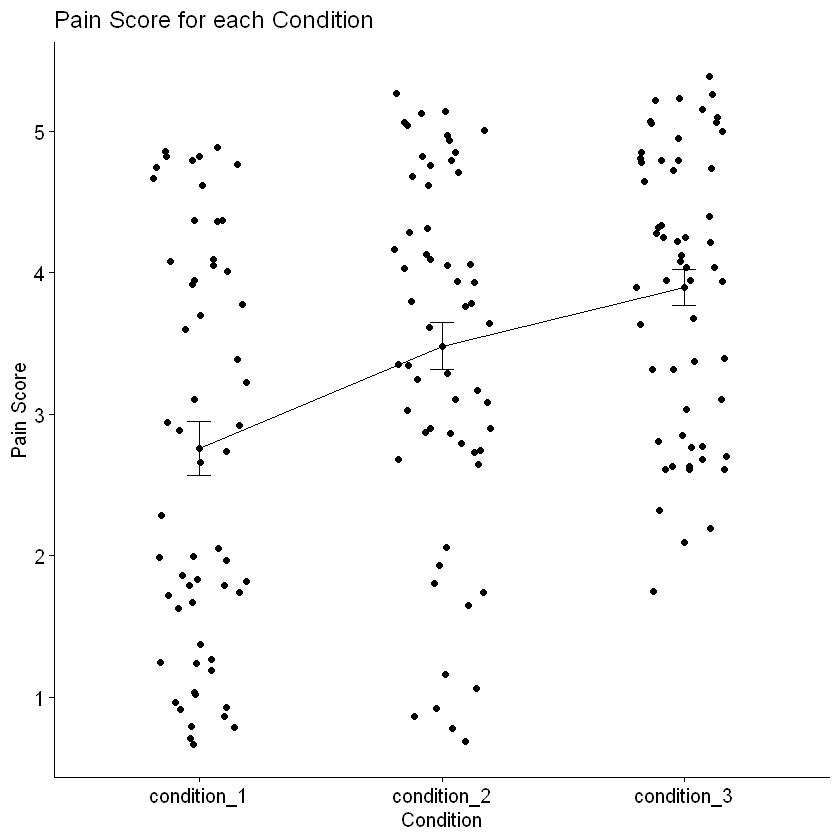

In [1]:
library("ggpubr")

# probabilistically deciding if there will be a significant difference between the pain severity outcome scores
# for three conditions (dependent samples)

coinflip = sample(c(0,1), 1)

sample_size = sample(seq(20, 100),1)

if(coinflip == 1){
    sample_1 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample_size)
    sample_2 = sample(seq(5), prob = c(0.5/5, 0.5/5, 1.5/5, 1.5/5, 1/5), replace= TRUE, size = sample_size)
    sample_3 = sample(seq(5), prob = c(0.1/5, 0.4/5, 1/5, 1.75/5, 1.75/5), replace= TRUE, size = sample_size)
    }else{
    sample_1 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample_size)
    sample_2 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample_size)
    sample_3 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample_size)
}

# generating labels for each score in each condition
condition_1_labels = rep('condition_1', length(sample_1))
condition_2_labels = rep('condition_2', length(sample_2))
condition_3_labels = rep('condition_3', length(sample_3))
person_labels = seq(sample_size)

# creating a dataframe for the simulated data
df = data.frame(pain_score = c(sample_1, sample_2, sample_3),
                condition = c(condition_1_labels, condition_2_labels, condition_3_labels),
               person = c(person_labels, person_labels, person_labels))

df$condition = as.factor(df$condition)
df$person = as.factor(df$person)
head(df, 10)

# generating a line plot showing the pain scores for the three treatment conditions
ggline(df, x = "condition", y = "pain_score", 
       add = c("mean_se", "jitter"), 
       ylab = "Pain Score", xlab = "Condition",
      main = 'Pain Score for each Condition')

# performing a  friedman test

fried_res = friedman.test(pain_score ~ condition|person, data = df)
print(fried_res)

# performing pairwise comparisons, corrected for multiple testing, if the friedman test is significant
if(fried_res$p.value <= 0.05){print('There is a significant difference in the mean ranks of the different conditions.')
                             pairwise_res = pairwise.wilcox.test(df$pain_score, df$condition,
                             p.adjust.method = "BH", paired = TRUE, exact = FALSE)
                                print(pairwise_res)
                              if(pairwise_res$p.value[1] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of condition 1 & condition 2')}
                              if(pairwise_res$p.value[2] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of condition 1 & condition 3')}
                              if(pairwise_res$p.value[4] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of condition 2 & condition 3')}
                             }else{print('There is NOT a significant difference in the mean ranks of the treatment conditions.')}